In [ ]:
!pip install datasets

     |████████████████████████████████| 325 kB 23.4 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 1.1 MB 63.5 MB/s 
     |████████████████████████████████| 212 kB 61.1 MB/s 
     |████████████████████████████████| 136 kB 76.2 MB/s 
     |████████████████████████████████| 127 kB 75.9 MB/s 
     |████████████████████████████████| 271 kB 73.2 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 72.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
%pip install -q -U imbalanced-learn

     |████████████████████████████████| 199 kB 33.9 MB/s 


In [ ]:
# import libraries

import seaborn as sns
import torch
import pandas as pd
import numpy as np
from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

ModuleNotFoundError: ignored

In [ ]:


datasets_list = list_datasets() 
pprint(datasets_list,compact=True) 

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc',
 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity',
 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami',
 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19',
 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect',
 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset',
 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic',
 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli',
 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent',
 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks',
 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus',
 'bn_hate_speech', 'bnl_newspapers', 'bookcorpus', 'bookcorpusopen', 'boolq',
 'bprec', 'break_data', 'brwac', 'bsd_ja

In [ ]:
hate_speech = load_dataset("tweets_hate_speech_detection")

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (/root/.cache/huggingface/datasets/tweets_hate_speech_detection/default/0.0.0/c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_hate_speech = hate_speech["train"].to_pandas()

In [ ]:
df_hate_speech['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
df_hate_speech["tweet"]
tweet_df = df_hate_speech.sort_values(by='tweet', ascending=False)
tweet_df

,label,tweet
29615,0,ó¾­© duchess ó¾ roxie sinesh ó¾­© â½ #sup...
8385,0,ó¾¬¥ó¾ó¾¬ó¾­ #daughter @user just got #gra...
22314,0,ó¾¬chill time with my fave guilty pleasure an...
11031,0,ó¾¬ó¾¬ó¾¬ love you. ó¾¬ó¾¬ó¾¬ . #sunday ...
4739,0,ó¾ð»ó¾ð»ó¾ð» #sunday #relax #fu...
...,...,...
2902,0,#arkansasdentalclinic the fun office! for a...
1589,0,"#americans displaced of their home, they are..."
19410,0,"#actionneeded nearly 12,000 pregnant women i..."
9207,0,"#joy #joy, #joy #joy. who knows what i'm ..."


In [ ]:
data = df_hate_speech

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


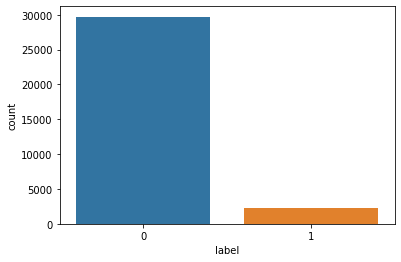

In [ ]:
ax=sns.countplot(data.label);

In [ ]:
# removing usernames from tweet
data['new_tweet'] = data.tweet.str.replace('@user', '', regex=True) # ';':''}, regex=True
data.head()

,label,tweet,new_tweet
0,0,@user when a father is dysfunctional and is so...,when a father is dysfunctional and is so self...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line
data["new_tweet"] = data["new_tweet"].str.replace("[^a-zA-Z#]", " ")
data["new_tweet"] = data["new_tweet"].str.replace("#", " ")
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,label,tweet,new_tweet
0,0,@user when a father is dysfunctional and is so...,when a father is dysfunctional and is so self...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Install hugging face library 
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 6.6 MB 28.8 MB/s 
     |████████████████████████████████| 895 kB 42.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# We can check the installed version
!pip show transformers

Name: transformers
Version: 4.18.0
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Sam Shleifer, Patrick von Platen, Sylvain Gugger, Suraj Patil, Stas Bekman, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /usr/local/lib/python3.7/dist-packages
Requires: sacremoses, tqdm, pyyaml, requests, packaging, importlib-metadata, numpy, tokenizers, regex, huggingface-hub, filelock
Required-by: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'negative'), Text(0, 0, 'positive')]

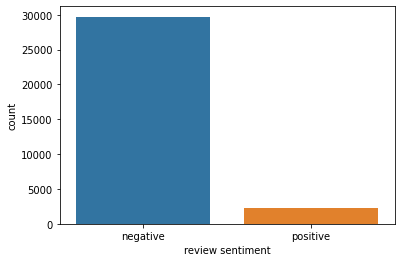

In [ ]:
# Plot the score distribution after conversion
ax = sns.countplot(data.label)
class_names = ['negative', 'positive']
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

In [ ]:
all_texts = list(data.new_tweet)
all_labels = list(data.label)

In [ ]:
!pip install emoji
import emoji

     |████████████████████████████████| 175 kB 30.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=c53035d378db2c003e5e4084044dac90c4348a2866682f69866b5bc6993c5ab0
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
all_texts_preprocessed = [emoji.demojize(t.lower(), language='en') for t in all_texts]
print(all_texts_preprocessed[15])

ouch   junior is angry     got   junior  yugyoem    omg 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_texts_preprocessed, all_labels, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_SEED, shuffle=True)
print(len(X_train), len(X_val), len(X_test))

25569 3196 3197


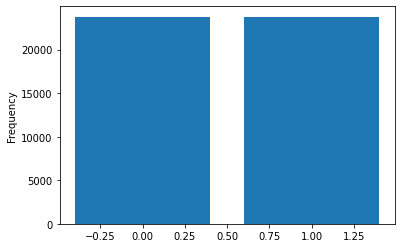

,new_tweet,label
0,because i ve been paying attention for the ...,1
1,raft building at salford quays as pa of the g...,0
2,friday gdegblog friday selfie b...,0
3,fashion it is a true fact,0
4,so to share the simple elegant business...,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
data, label = sampler.fit_resample(np.array(X_train).reshape(-1,1), list(y_train))

class_dist = pd.Series(label).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
data.flatten()
data = pd.DataFrame(data, columns = ['new_tweet'])
data['label'] = label
data.head()

In [ ]:
from transformers import BertTokenizer
# Specify the pre-trained model name.
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Print the preprocessed review text.
print('Preprocessed Text: {}'.format(X_train[2]))

# Print the text split into tokens.
print('Tokens: {}'.format(tokenizer.tokenize(X_train[2])))

# Print the tokens mapped to token ids.
print('Token IDs: {}'.format(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(X_train[2]))))

Preprocessed Text: friday           gdegblog  friday  selfie    beard  gayguy  gaymen  gaystyle  lifestyle  fullness    
Tokens: ['friday', 'g', '##de', '##gb', '##log', 'friday', 'self', '##ie', 'beard', 'gay', '##gu', '##y', 'gay', '##men', 'gay', '##sty', '##le', 'lifestyle', 'full', '##ness']
Token IDs: [5958, 1043, 3207, 18259, 21197, 5958, 2969, 2666, 10154, 5637, 12193, 2100, 5637, 3549, 5637, 21756, 2571, 9580, 2440, 2791]


In [ ]:
# Print the preprocessed review text.
print('Preprocessed Text: {}'.format(X_train[2]))

# Encode the preprocessed text by using encode_plus function
encoded = tokenizer.encode_plus(
                          text=X_train[2],
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]' and [PAD]
                          max_length=64,      # Pad & truncate all texts 
                          pad_to_max_length = True,
                          return_token_type_ids=False,
                          return_attention_mask = True, # Construct attention masks
                          return_tensors = 'pt', # Return pytorch tensors
                    )
print('input_ids: {}'.format(encoded['input_ids']))
print('attention_mask: {}'.format(encoded['attention_mask']))

NameError: ignored

In [ ]:
# So to put all the things together,
# we can write a class: with the input texts, labels, tokenizer and max_len
# we'll have the review_text, input_ids, attention_mask, labels as our output
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):

  def __init__(self, reviews, labels, tokenizer, max_len):
    self.reviews = reviews
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    label = self.labels[item]
    # `encode_plus` will:
      #   (1) Tokenize the text.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      #   (5) Pad or truncate the sentence to `max_length` with [PAD] tokens
      #   (6) Create attention masks for [PAD] tokens
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True, # Add '[CLS]' and '[SEP]' and [PAD]
      max_length=self.max_len, # Pad & truncate all texts
      pad_to_max_length=True,
      return_token_type_ids=False,
      return_attention_mask=True, # Construct attention masks
      return_tensors='pt', # Return pytorch tensors
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'labels': torch.tensor(label, dtype=torch.long)
    }

In [ ]:
# Then we use DataLoader class from pytorch https://pytorch.org/docs/stable/data.html
# which help us to customizing data loading order and do automatic batching
def create_data_loader(X, Y, tokenizer, max_len, batch_size, num_workers=2, sampler = None):
  ds = ReviewDataset(
    reviews=np.array(X),
    labels=np.array(Y),
    tokenizer=tokenizer,
    max_len=max_len
  )
  if sampler!=None:
    sampler = sampler(ds)

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=num_workers,
    sampler = sampler
  )

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
MAX_LEN = 128
BATCH_SIZE = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_data_loader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE, sampler = RandomSampler) # Select batches randomly

# For validation & testing samples, the order doesn't matter, so we'll just read them sequentially.
val_data_loader = create_data_loader(X_val, y_val, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

test_data_loader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

NameError: ignored

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels, in our case it's multi-class tasks with classes=3  
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

NameError: ignored

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# More optimizers to look up: https://pytorch.org/docs/stable/optim.html
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 1e-3
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-6.
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4 (depend on the usage, you can also set it larger)
# We chose to run for 3
EPOCHS = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_data_loader) * EPOCHS

# Create the learning rate scheduler, here we use a linear scheduler with no warmup steps
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

# Define our loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
# Training
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model.train()
  total_train_accuracy = 0
  total_train_loss = 0
  losses = []
  correct_predictions = 0
  for step, batch in enumerate(data_loader):
    if step % 40 == 0 and not step == 0:
       print('Batch: {}  of  {}'.format(step, len(data_loader)))
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    model.zero_grad()
    outputs = model(
      input_ids=input_ids,
      token_type_ids=None,
      attention_mask=attention_mask,
      labels=labels
    )
    loss = outputs[0]
    total_train_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    logits = outputs[1].detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()
    total_train_accuracy += flat_accuracy(logits, label_ids)
  # Calculate the average loss over all of the batches.
  avg_train_accuracy = total_train_accuracy / len(data_loader)
  avg_train_loss = total_train_loss / len(data_loader) 
  return avg_train_accuracy, avg_train_loss

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def f1Score(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(pred_flat, labels_flat)

In [ ]:
# Evaluation

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model.eval()
  total_eval_accuracy = 0
  total_f1_score = 0
  total_eval_loss = 0
  nb_eval_steps = 0
  losses = []
  f1_label_ids = []
  f1_logits = []
  correct_predictions = 0
  with torch.no_grad():
    for batch in data_loader:
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      labels = batch["labels"].to(device)
      outputs = model(
        input_ids=input_ids,
        token_type_ids=None,
        attention_mask=attention_mask,
        labels=labels
      )
      total_eval_loss += outputs[0].item()
      logits = outputs[1].detach().cpu().numpy()
      label_ids = labels.to('cpu').numpy()
      total_eval_accuracy += flat_accuracy(logits, label_ids)
      f1_label_ids.append(label_ids)
      f1_logits.append(logits)

  avg_val_accuracy = total_eval_accuracy / len(data_loader)
  avg_val_loss = total_eval_loss / len(data_loader)
  #print("total_f1_score Loss: {0:.2f}".format(f1Score(f1_logits, f1_label_ids)))
  #print("Accuracy: {0:.2f}".format(avg_val_accuracy))
  #print("Validation Loss: {0:.2f}".format(avg_val_loss))
  return avg_val_accuracy, avg_val_loss

In [ ]:
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
  print('Epoch: {}/{}'.format(epoch+1, EPOCHS))
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(X_train)
  )
  print('Train loss: {}, Accuracy: {}'.format(train_loss, train_acc))
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(X_val)
  )
  print('Val loss: {}, Accuracy: {}'.format(val_loss, val_acc))
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch: 1/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Batch: 40  of  800
Batch: 80  of  800
Batch: 120  of  800
Batch: 160  of  800
Batch: 200  of  800
Batch: 240  of  800
Batch: 280  of  800
Batch: 320  of  800
Batch: 360  of  800
Batch: 400  of  800
Batch: 440  of  800
Batch: 480  of  800
Batch: 520  of  800
Batch: 560  of  800
Batch: 600  of  800
Batch: 640  of  800
Batch: 680  of  800
Batch: 720  of  800
Batch: 760  of  800
Train loss: 0.14390385233738925, Accuracy: 0.9529296875


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss: 0.1297598606091924, Accuracy: 0.9615178571428571

Epoch: 2/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Batch: 40  of  800
Batch: 80  of  800
Batch: 120  of  800
Batch: 160  of  800
Batch: 200  of  800
Batch: 240  of  800
Batch: 280  of  800
Batch: 320  of  800
Batch: 360  of  800
Batch: 400  of  800
Batch: 440  of  800
Batch: 480  of  800
Batch: 520  of  800
Batch: 560  of  800
Batch: 600  of  800
Batch: 640  of  800
Batch: 680  of  800
Batch: 720  of  800
Batch: 760  of  800
Train loss: 0.06916581800418499, Accuracy: 0.9785546875


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss: 0.1188377366354689, Accuracy: 0.9655803571428571

Epoch: 3/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Batch: 40  of  800
Batch: 80  of  800
Batch: 120  of  800
Batch: 160  of  800
Batch: 200  of  800
Batch: 240  of  800
Batch: 280  of  800
Batch: 320  of  800
Batch: 360  of  800
Batch: 400  of  800
Batch: 440  of  800
Batch: 480  of  800
Batch: 520  of  800
Batch: 560  of  800
Batch: 600  of  800
Batch: 640  of  800
Batch: 680  of  800
Batch: 720  of  800
Batch: 760  of  800
Train loss: 0.031753179979568814, Accuracy: 0.991015625


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss: 0.1525012480476289, Accuracy: 0.9646428571428571

CPU times: user 26min 43s, sys: 12.3 s, total: 26min 56s
Wall time: 27min 6s


In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)
print('Testing Accuracy: {}'.format(test_acc.item()))

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Testing Accuracy: 0.9718426724137932


In [ ]:
# To prevent from retraining models, you can save them to disk and load them
# later on
import os
MODEL_PATH = "/content/drive/MyDrive/uni-mannheim/DM/project"
def save(model, filename):
    torch.save(model.state_dict(), os.path.join(MODEL_PATH, filename))


def load(model, filename):
    model.load_state_dict(torch.load(os.path.join(MODEL_PATH, filename)))
    return model

In [ ]:
try:    
    from google.colab import drive
    drive.mount('/content/drive/', force_remount= True)
except ImportError as e:
    print("error")
    pass

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/MyDrive/uni-mannheim/DM/project'

/content/drive/MyDrive/uni-mannheim/DM/project


In [ ]:
save(model, "fine-_tunned_bert.pt")

In [ ]:
load(model, "fine-_tunned_bert.pt")

NameError: ignored

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/uni-mannheim/DM/project')

IsADirectoryError: ignored